In [1]:
import requests

res = requests.post("http://localhost:8080/predictions/cifar", files={'data': open('1_truck.png', 'rb')})

res.json()

{'truck': 0.9999679327011108,
 'automobile': 3.0300016078399494e-05,
 'horse': 1.23637551041611e-06,
 'plane': 2.146247908285659e-07,
 'cat': 1.847439534685691e-07}

In [2]:
res = requests.post("http://localhost:8080/explanations/cifar", files={'data': open('1_truck.png', 'rb')})

ig = res.json()

In [3]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

In [4]:
img_path = "1_truck.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
    T.Resize((32, 32)),
    T.ToTensor(),
    T.Normalize((0.4914, 0.4822, 0.4465),
                (0.247, 0.243, 0.261))
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

inp_image, attributions = inp_image.transpose(1, 2, 0), attributions.transpose(1, 2, 0)

In [5]:
inp_image.shape, attributions.shape

((32, 32, 3), (32, 32, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


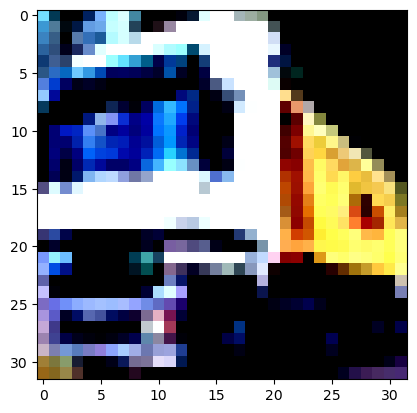

In [6]:
import matplotlib.pyplot as plt

plt.imshow(inp_image, cmap="inferno")

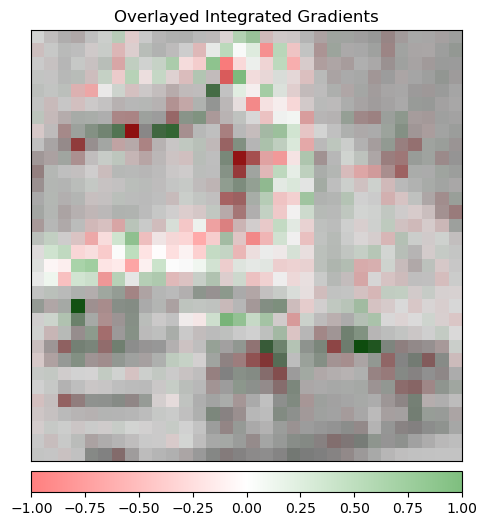

(<Figure size 600x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Overlayed Integrated Gradients'}>)

In [7]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")